In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_test = pd.read_csv('/content/sample_data/mnist_test.csv')
data_train=pd.read_csv('/content/drive/MyDrive/Chrome Syncable FileSystem/mnist_train.csv')

In [ ]:
data_test = np.array(data_test)
data_train=np.array(data_train)

In [ ]:
rows, cols = data_test.shape
np.random.shuffle(data_test)

#separate test data
test_data = data_test[:].T
y_test = test_data[0]
x_test = test_data[1:]
x_test = x_test / 255.

np.random.shuffle(data_train)
train_data = data_train[:].T
y_train = train_data[0]
x_train = train_data[1:]
x_train = x_train / 255

In [ ]:
label_range = set(list(y_test) + list(y_train))

In [ ]:
class numpy_nn:
    def __init__(self, X=None, Y = None, lr = None):

        self.Weight1 = np.random.rand(20, 784) - 0.5#(10,700)
        self.Bias1 = np.random.rand(20, 1) - 0.5#(10,1)

        self.Weight2 = np.random.rand(10, 20) - 0.5#(10,10)
        self.Bias2 = np.random.rand(10, 1) - 0.5#(10,1)

        self.out1 = None
        self.Activ1 = None
        self.out2 = None
        self.Activ2 = None


        self.accuracy=[]
        self.losses=[]

        self.lr = lr

        self.labels = Y
        self.X = X

    def forward_prop(self):

        self.out1 = self.Weight1.dot(self.X) + self.Bias1
        self.Activ1 = self.relu(self.out1)


        self.out2 = self.Weight2.dot(self.Activ1) + self.Bias2
        self.Activ2 = self.softmax(self.out2)

    def relu(self, Z):
        return np.maximum(Z, 0)

    def softmax(self, z):
        a = np.exp(z) / sum(np.exp(z))
        return a

    def backward_prop(self):
        m = self.labels.size
        one_hot_y = self.one_hot_encod()
        dz2 = self.Activ2 - one_hot_y
        dw2 = (1 / m) * dz2.dot(self.Activ1.T)
        db2 = (1 / m) * np.sum(dz2)


        dz1 = self.Weight2.T.dot(dz2) * self.deriv_relu(self.out1)
        dw1 = (1 / m) * dz1.dot(self.X.T)
        db1 = (1 / m) * np.sum(dz1)

        self.update_params(dw1, db1, dw2, db2)
        #self.update_params(dw1, db1)

    def one_hot_encod(self):
        one_hot_shape = (self.labels.size, len(label_range))
        one_hot_y = np.zeros(one_hot_shape)
        one_hot_y[np.arange(self.labels.size), self.labels] = 1
        return one_hot_y.T

    def deriv_relu(self, Z):
        return Z > 0

    def update_params(self, dw1, db1, dw2, db2):
    #def update_params(self, dw1, db1):
        self.Weight1 = self.Weight1 - self.lr * dw1
        self.Bias1 = self.Bias1 - self.lr * db1

        self.Weight2 = self.Weight2 - self.lr * dw2
        self.Bias2 = self.Bias2 - self.lr * db2

    def get_accuracy(self):
        predictions = self.get_predictions()
        self.accuracy.append( (np.sum(predictions == self.labels) / self.labels.size)*100)
        return np.sum(predictions == self.labels) / self.labels.size

    def calculate_loss(self):
        m = self.labels.size
        one_hot_y = self.one_hot_encod()
        loss = -np.sum(one_hot_y * np.log(self.Activ2 + 1e-8)) / m
        self.losses.append(loss)
        return loss

    def get_predictions(self,):
        return np.argmax(self.Activ2, 0)

    def plot_accuracy(self):
      epochs_range = range(50, len(self.accuracy) * 50 + 1, 50)

      plt.plot(epochs_range, self.accuracy, marker='o')
      plt.title('Accuracy per Epoch')
      plt.xlabel('Epoch')
      plt.ylabel('Accuracy (%)')
      plt.show()

    def plot_loss(self):
        epochs_range = range(50, len(self.accuracy) * 50 + 1, 50)
        plt.plot(epochs_range, self.losses, marker='o', color='r')
        plt.title('Loss per Epoch')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')

        plt.tight_layout()
        plt.show()

In [ ]:
def gradient_descent(X, Y, epochs):
    for i in range(epochs):
        neural_net_init.forward_prop()
        neural_net_init.backward_prop()
        if i%50==0:
            print('epochs: {}'.format(i))
            print("Accuracy: {}".format(neural_net_init.get_accuracy()*100))
            print("Loss: {}".format(neural_net_init.calculate_loss()))


In [ ]:
epochs = 800
lr = 0.10

neural_net_init = numpy_nn(x_train, y_train, lr)
gradient_descent(x_train, y_train, epochs)


epochs: 0
Accuracy: 10.040167336122268
Loss: 3.4943326692730534
epochs: 50
Accuracy: 67.4544575742929
Loss: 1.0227958609220533
epochs: 100
Accuracy: 76.69961166019434
Loss: 0.7413851750218737
epochs: 150
Accuracy: 80.4213403556726
Loss: 0.6308855266388164
epochs: 200
Accuracy: 82.4913748562476
Loss: 0.569179446824018
epochs: 250
Accuracy: 83.83473057884298
Loss: 0.5285839016444843
epochs: 300
Accuracy: 84.79641327355456
Loss: 0.49903154838059377
epochs: 350
Accuracy: 85.616426940449
Loss: 0.476107096169043
epochs: 400
Accuracy: 86.26477107951798
Loss: 0.4575846672588621
epochs: 450
Accuracy: 86.77477957965965
Loss: 0.4421137159465497
epochs: 500
Accuracy: 87.26478774646243
Loss: 0.42891186055494146
epochs: 550
Accuracy: 87.67146119101984
Loss: 0.41743405645075904
epochs: 600
Accuracy: 88.06980116335272
Loss: 0.40728652530281007
epochs: 650
Accuracy: 88.36313938565642
Loss: 0.39820443718765214
epochs: 700
Accuracy: 88.62147702461708
Loss: 0.3900119975790852
epochs: 750
Accuracy: 88.9014

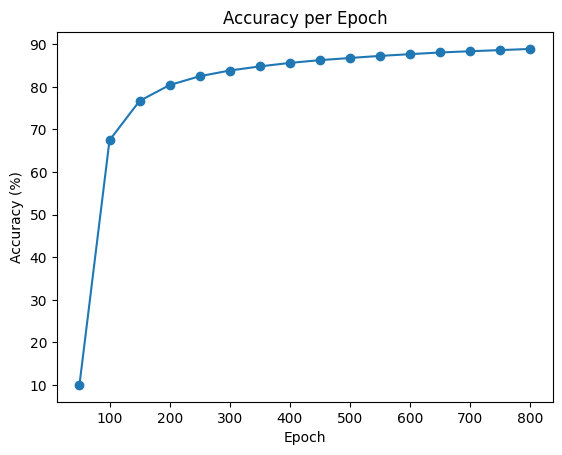

In [ ]:
neural_net_init.plot_accuracy()


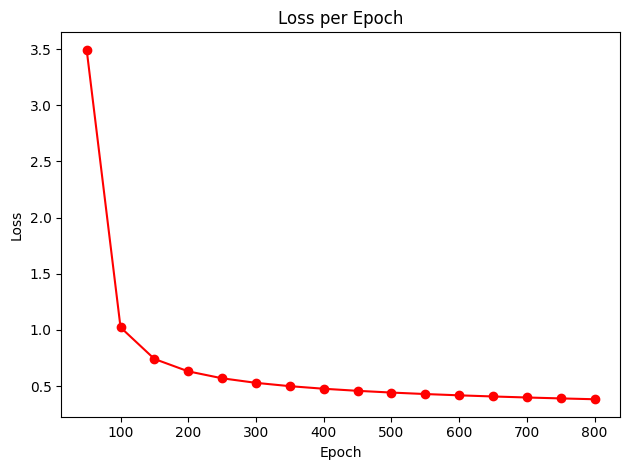

In [ ]:
neural_net_init.plot_loss()

Predicted label: [0]
Actual label: [0]


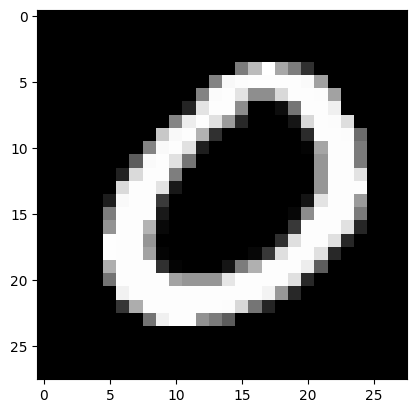

In [ ]:
def trial():
    _, m = x_test.shape
    index = np.random.randint(m +1, size=1)
    current_image = x_test[:, int(index), None]
    label = y_test[index]

    neural_net_init.X = current_image
    neural_net_init.labels = label

    neural_net_init.forward_prop()
    prediction = neural_net_init.get_predictions()
    print("Predicted label: {}".format(prediction))
    print("Actual label: {}".format(label))

    current_image = current_image.reshape((28,28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()

trial()

In [ ]:
image_set = x_test
label = y_test
neural_net_init.X = image_set
neural_net_init.labels = label
neural_net_init.forward_prop()
accuracy = neural_net_init.get_accuracy()
loss=neural_net_init.calculate_loss()
print("accuracy : {}".format(accuracy*100))
print("loss: {}".format(loss))

accuracy : 89.54895489548956
